# **Dados de casas para alugar (2020) / Houses to rent data (2020)**

**Descrição / Description**

Este dataset possui 10962 casas para alugar com 13 classes diferentes./This dataset contains 10962 houses to rent with 13 diferent features.

**FAQ**

**Outliers **
Podem conter alguns valores no dataset que são considerados outlier para analise. Tendo em vista que foi utilizado um WebCrawler apenas para pegar os dados, os mesmos estão sujeitos a problemas como erros no cadastros.

Could be some values in dataset that can be consider outlier to analysis. Bearing in mind that a Web Crawler only to get the data, it´s possible find some errors like registration error

**Mudanças de dados entre as versões de dataset/ Changes in data between versions of dataset **
Visto que WebCrawler foi rodado em dias diferentes para cada versão do dataset, podem haver diferenças como adição ou exclusão de casas (alem das cidades adicionadas).

Since the o WebCrawler was runned in differents days to each version of dataset, there may be differences like adding or deleting houses (in addition to the cities added)

--------------------------------------------------------------------------------------------------------------------------------------------------------
Eu não tenho propriedade de nenhum desses dados, todos eles foram retirados de informações disponíveis gratuitamente na internet e compilados apenas para facilitar o acesso.
I do not own any of these data, they were all taken from information available for free on the internet and compiled just for easy access.

https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder
from plotly.offline import init_notebook_mode,iplot

In [2]:
df = pd.read_csv('../input/brasilian-houses-to-rent/houses_to_rent_v2.csv')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
df.isna().sum(axis=0)

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

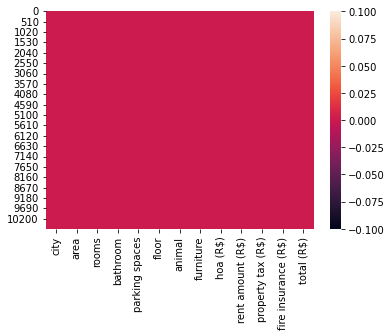

In [4]:
sns.heatmap(df.isnull());

In [5]:
df = df.rename(columns = {'parking spaces' : 'parking', 'hoa (R$)' : 'hoa', 'rent amount (R$)' : 'rent_amount', 'property tax (R$)' : 'property_tax', 'fire insurance (R$)' : 'fire_insurance', 'total (R$)' : 'total' })

# **Exploring the Data**

In [6]:
temp = df.describe()
temp.style.background_gradient(cmap='Oranges')

,area,rooms,bathroom,parking,hoa,rent_amount,property_tax,fire_insurance,total
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000
mean,149.217920,2.506079,2.236813,1.609147,1174.021698,3896.247194,366.704358,53.300879,5490.487000
std,537.016942,1.171266,1.407198,1.589521,15592.305248,3408.545518,3107.832321,47.768031,16484.725912
min,11.000000,1.000000,1.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,56.000000,2.000000,1.000000,0.000000,170.000000,1530.000000,38.000000,21.000000,2061.750000
50%,90.000000,2.000000,2.000000,1.000000,560.000000,2661.000000,125.000000,36.000000,3581.500000
75%,182.000000,3.000000,3.000000,2.000000,1237.500000,5000.000000,375.000000,68.000000,6768.000000
max,46335.000000,13.000000,10.000000,12.000000,1117000.000000,45000.000000,313700.000000,677.000000,1120000.000000


In [7]:
g1 = [go.Box(y=df.rooms,name="rooms",marker=dict(color="rgba(51,0,0,0.9)"),hoverinfo="name+y")]
g2 = [go.Box(y=df.bathroom,name="bathroom",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
g3 = [go.Box(y=df.parking,name="parking",marker=dict(color="rgba(9,80,58,12.2)"),hoverinfo="name+y")]
layout2 = go.Layout(title="Houses",yaxis=dict(range=[0,13])) 
fig2 = go.Figure(data=g1+g2+g3,layout=layout2)
iplot(fig2)

In [8]:
class color:
   DARKCYAN = '\033[36m'
   BLUE = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
print(color.DARKCYAN + '\033[1m' + '\033[4m' + 'Maximum lease amount: R$', df['total'].max(), '' +  color.END)
print(color.BLUE + '\033[1m' + '\033[4m' + 'Minimum lease amount:: R$', df['total'].min(), '' +  color.END)
print(color.DARKCYAN + '\033[1m' + '\033[4m' + 'Average lease value: R$', df['total'].mean(), '' +  color.END)
print('')
print(color.BLUE + '\033[1m' + '\033[4m' + 'Minimum lease amount:: R$', df['area'].min(), '' +  color.END)
print(color.BLUE + '\033[1m' + '\033[4m' + 'Maximum lease amount: R$', df['area'].max(), '' +  color.END)
print(color.BLUE + '\033[1m' + '\033[4m' + 'Average lease value: R$', df['area'].mean(), '' +  color.END)

Maximum lease amount: R$ 1120000 
Minimum lease amount:: R$ 499 
Average lease value: R$ 5490.4869996258885 

Minimum lease amount:: R$ 11 
Maximum lease amount: R$ 46335 
Average lease value: R$ 149.21791994014217 


In [9]:
df.loc[df['total'] > 10000]

,city,area,rooms,bathroom,parking,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
19,São Paulo,600,4,5,6,-,acept,not furnished,0,12000,9500,181,21680
37,Belo Horizonte,80,3,2,1,-,acept,not furnished,0,11000,425,181,11610
40,São Paulo,300,4,6,4,20,acept,not furnished,3700,12000,1584,153,17440
44,São Paulo,360,4,5,0,1,acept,not furnished,4000,6410,2000,82,12490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,São Paulo,141,3,5,0,4,acept,not furnished,909,10140,772,129,11950
10681,São Paulo,230,3,5,3,3,not acept,not furnished,3800,11000,1100,140,16040
10686,São Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260


In [10]:
df = df.drop(df[df['total'] > 6000].index)
df

,city,area,rooms,bathroom,parking,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680,São Paulo,156,4,4,3,1,acept,furnished,2000,2200,750,28,4978
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419
10684,Rio de Janeiro,98,2,1,0,1,acept,not furnished,560,3900,184,51,4695
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926


In [11]:
grafico = px.box(df, y='total')
grafico.show()

In [12]:
df.loc[df['area'] > 1000]

,city,area,rooms,bathroom,parking,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
5129,Belo Horizonte,2000,4,2,3,-,acept,not furnished,0,4956,200,82,5238
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417


In [13]:
df = df.drop(df[df['area'] > 300].index)
grafico = px.box(df, y='area')
grafico.show()

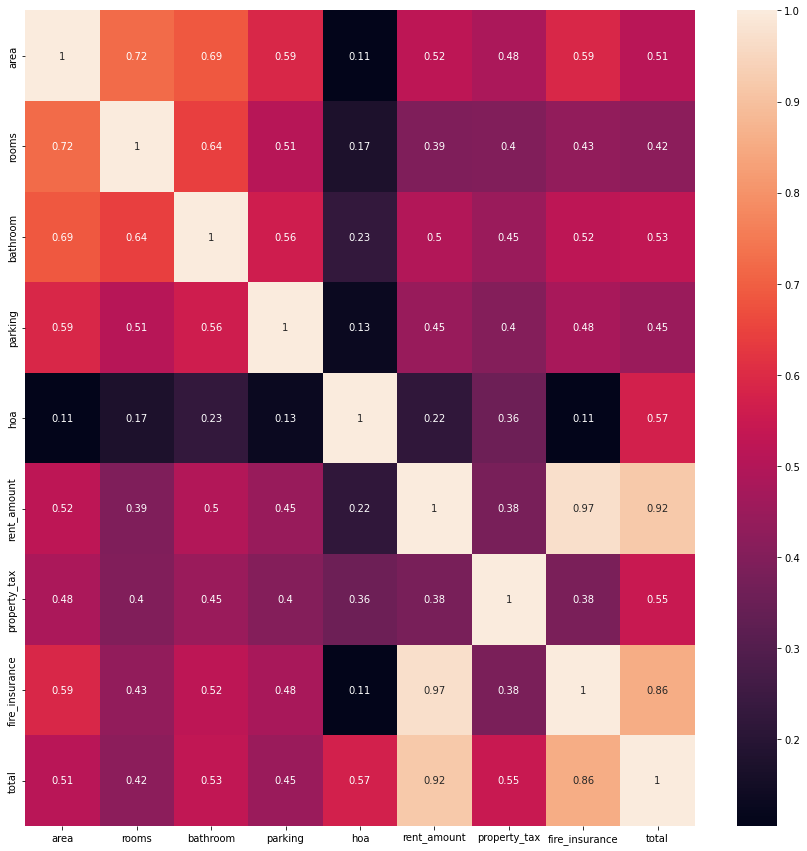

In [14]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot=True)
correlations.round(2);

In [15]:
fig2 = px.histogram(df,x='city',color='city',template='plotly_dark')
fig2.show()

In [16]:
fig2 = px.histogram(df,x='rooms',color='rooms',template='plotly_dark')
fig2.show()

In [17]:
fig2 = px.histogram(df,x='bathroom',color='bathroom',template='plotly_dark')
fig2.show()

In [18]:
fig2 = px.histogram(df,x='parking',color='parking',template='plotly_dark')
fig2.show()

In [19]:
fig2 = px.histogram(df,x='floor',color='floor',template='plotly_dark')
fig2.show()

In [20]:
fig2 = px.histogram(df,x='animal',color='animal',template='plotly_dark')
fig2.show()

In [21]:
fig2 = px.histogram(df,x='furniture',color='furniture',template='plotly_dark')
fig2.show()

# **Linear Regression Simple**

**Our objective will be, through the property's footage, to make a forecast of the property's total cost.**

In [22]:
X_houses = df.iloc[:,1:2].values
X_houses

array([[70],
       [80],
       [51],
       ...,
       [98],
       [63],
       [80]])

In [23]:
y_houses = df.iloc[:,12].values
y_houses

array([5618, 3841, 1421, ..., 4695, 1926, 1587])

In [24]:
from sklearn.model_selection import train_test_split
X_houses_train, X_houses_test, y_houses_train, y_houses_test = train_test_split(X_houses, y_houses, test_size = 0.3, random_state = 0)

In [25]:
X_houses_train.shape, y_houses_train.shape

((5206, 1), (5206,))

In [26]:
X_houses_test.shape, y_houses_test.shape

((2232, 1), (2232,))

In [27]:
from sklearn.linear_model import LinearRegression
regression_simple_houses = LinearRegression()
regression_simple_houses.fit(X_houses_train, y_houses_train)

LinearRegression()

In [28]:
regression_simple_houses.intercept_


1767.4988643689849

In [29]:
regression_simple_houses.coef_

array([12.64364132])

In [30]:
regression_simple_houses.score(X_houses_train, y_houses_train)

0.2658213667092314

Analyzing the performance through the score is very bad, we will hardly use this algorithm to make house predictions, as we are looking for values closer to 1.

In [31]:
regression_simple_houses.score(X_houses_test, y_houses_test)

0.2515848988756081

In [32]:
forecasts = regression_simple_houses.predict(X_houses_train)
forecasts

array([2753.70288706, 2437.61185414, 2677.84103916, ..., 2450.25549546,
       2627.26647389, 2399.68093019])

In [33]:
graphic = px.scatter(x = X_houses_train.ravel(), y = forecasts)
graphic.show()

**In this chart we can visualize the predictions for each one of the training database records, the line is straight, because the formula is the straight equation.**

In [34]:
grafico1 = px.scatter(x = X_houses_train.ravel(), y = y_houses_train)
grafico2 = px.line(x = X_houses_train.ravel(), y = forecasts)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

**In blue is the real answer and red is the predictions that the algorithm made.**

In [35]:
forecasts_test = regression_simple_houses.predict(X_houses_test)
forecasts_test

array([2273.24451703, 2399.68093019, 3537.60864868, ..., 2905.42658285,
       2500.83006073, 3284.73582235])

In [36]:
y_houses_test

array([ 993, 1062, 5676, ..., 4442, 1319, 2997])

In [37]:
abs(y_houses_test - forecasts_test).mean()

961.5559111992415

As mentioned before, this algorithm was not interesting for analyzing the values, the large difference in the rent for more and less.

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
mean_absolute_error(y_houses_test, forecasts_test)

961.5559111992415

In [40]:
mean_squared_error(y_houses_test, forecasts_test)

1351694.2128141806

In [41]:
np.sqrt(mean_squared_error(y_houses_test, forecasts_test))

1162.623848376671

In [42]:
grafico1 = px.scatter(x = X_houses_test.ravel(), y = y_houses_test)
grafico2 = px.line(x = X_houses_test.ravel(), y = forecasts_test)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3.show()

**We can observe the same behavior we had for the training database.**

# **Multiple Linear Regression**

In [43]:
df

,city,area,rooms,bathroom,parking,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680,São Paulo,156,4,4,3,1,acept,furnished,2000,2200,750,28,4978
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419
10684,Rio de Janeiro,98,2,1,0,1,acept,not furnished,560,3900,184,51,4695
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926


In [44]:
from sklearn.preprocessing import  LabelEncoder

In [45]:
mk = LabelEncoder()
df['city'] = mk.fit_transform(df['city'])
df['animal'] = mk.fit_transform(df['animal'])
df['furniture'] = mk.fit_transform(df['furniture'])
df['floor'] = mk.fit_transform(df['floor'])
df1 = df
df1

,city,area,rooms,bathroom,parking,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,4,70,2,1,1,28,0,0,2065,3300,211,42,5618
2,2,80,1,1,1,27,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,12,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836
6,3,72,2,1,0,28,0,1,740,1900,85,25,2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680,4,156,4,4,3,1,0,0,2000,2200,750,28,4978
10682,2,160,3,2,3,24,0,0,850,3300,220,49,4419
10684,3,98,2,1,0,1,0,1,560,3900,184,51,4695
10687,2,63,2,1,1,25,1,0,402,1478,24,22,1926


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7438 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   city            7438 non-null   int64
 1   area            7438 non-null   int64
 2   rooms           7438 non-null   int64
 3   bathroom        7438 non-null   int64
 4   parking         7438 non-null   int64
 5   floor           7438 non-null   int64
 6   animal          7438 non-null   int64
 7   furniture       7438 non-null   int64
 8   hoa             7438 non-null   int64
 9   rent_amount     7438 non-null   int64
 10  property_tax    7438 non-null   int64
 11  fire_insurance  7438 non-null   int64
 12  total           7438 non-null   int64
dtypes: int64(13)
memory usage: 813.5 KB


In [47]:
X_houses = df.iloc[:,0:12].values
X_houses

array([[   4,   70,    2, ..., 3300,  211,   42],
       [   2,   80,    1, ..., 2800,    0,   41],
       [   2,   51,    2, ..., 1112,   22,   17],
       ...,
       [   3,   98,    2, ..., 3900,  184,   51],
       [   2,   63,    2, ..., 1478,   24,   22],
       [   4,   80,    2, ..., 1400,  165,   22]])

In [48]:
y_houses = df.iloc[:, 12].values
y_houses

array([5618, 3841, 1421, ..., 4695, 1926, 1587])

In [49]:
from sklearn.model_selection import train_test_split
X_houses_train, X_houses_test, y_houses_train, y_houses_test = train_test_split(X_houses, y_houses, test_size = 0.3, random_state = 0)

In [50]:
X_houses_train.shape, X_houses_test.shape

((5206, 12), (2232, 12))

In [51]:
regression_multiple_houses = LinearRegression()
regression_multiple_houses.fit(X_houses_train, y_houses_train)

LinearRegression()

In [52]:
regression_multiple_houses.intercept_

-0.197316547094033

In [53]:
regression_multiple_houses.coef_

array([ 1.15807923e-01, -7.08940999e-04,  2.29076148e-02,  2.12797264e-01,
        5.53069082e-02,  6.02026218e-04, -2.13379159e-01,  1.50256560e-01,
        9.99768686e-01,  1.00056473e+00,  9.99045768e-01,  9.52301540e-01])

In [54]:
len(regression_multiple_houses.coef_)

12

In [55]:
regression_multiple_houses.score(X_houses_train, y_houses_train)

0.9999697661209842

**The results of this algorithm are much better than those of linear regression, certainly if we had to choose between the two algorithms it would be this one for real estate price forecasts, which has a precision of more than 99% in this case study.**

In [56]:
regression_multiple_houses.score( X_houses_test, y_houses_test)

0.9999743296906225

In [57]:
forecasts = regression_multiple_houses.predict( X_houses_test)
forecasts

array([ 993.3440933 , 1062.14703579, 5675.29377148, ..., 4442.58174618,
       1319.08026829, 2996.99483534])

In [58]:
y_houses_test

array([ 993, 1062, 5676, ..., 4442, 1319, 2997])

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_houses_test, forecasts)

0.4606660378356177

# **Polynomial Regression**

In [60]:
X_houses_train.shape, X_houses_test.shape

((5206, 12), (2232, 12))

In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_houses_train_poly = poly.fit_transform(X_houses_train)
X_houses_test_poly = poly.transform(X_houses_test)

In [62]:
X_houses_train_poly.shape, X_houses_test_poly.shape

((5206, 91), (2232, 91))

In [63]:
regression_houses_poly = LinearRegression()
regression_houses_poly.fit(X_houses_train_poly, y_houses_train)

LinearRegression()

In [64]:
regression_houses_poly.score(X_houses_train_poly, y_houses_train)

0.9999699825033356

**As in the multiple regression we had an excellent result too.**

In [65]:
regression_houses_poly.score(X_houses_test_poly, y_houses_test)

0.9999740355851232

In [66]:
forecasts = regression_houses_poly.predict(X_houses_test_poly)
forecasts

array([ 993.35015337, 1062.20450998, 5676.59889538, ..., 4444.48120346,
       1318.83171832, 2997.11209901])

In [67]:
y_houses_test

array([ 993, 1062, 5676, ..., 4442, 1319, 2997])

In [68]:
mean_absolute_error(y_houses_test, forecasts)

0.6759478163936754

# **Regression Decision Trees**

In [69]:
X_houses_train.shape, X_houses_test.shape

((5206, 12), (2232, 12))

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
regression_tree_houses = DecisionTreeRegressor()
regression_tree_houses.fit(X_houses_train, y_houses_train)

DecisionTreeRegressor()

In [72]:
regression_tree_houses.score(X_houses_train, y_houses_train)

1.0

In [73]:
regression_tree_houses.score(X_houses_test, y_houses_test)

0.9883641857959492

In [74]:
forecasts = regression_tree_houses.predict(X_houses_test)
forecasts

array([ 995., 1072., 5526., ..., 4452., 1318., 2951.])

Here we can compare the results above and below, the error is very small in the predictions.

In [75]:
y_houses_test

array([ 993, 1062, 5676, ..., 4442, 1319, 2997])

In [76]:
mean_absolute_error(y_houses_test, forecasts)

65.85125448028674

**The error margin is a little smaller than the previous algorithm.**

# **Random Forest Regression**

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
regression_random_forest_houses = RandomForestRegressor(n_estimators=100)
regression_random_forest_houses.fit(X_houses_train, y_houses_train)

RandomForestRegressor()

In [79]:
regression_random_forest_houses.score(X_houses_train, y_houses_train)

0.9994837586594523

Very good results too, we can observe that there was a small retreat in relation to the training of the previous algorithm.

In [80]:
regression_random_forest_houses.score(X_houses_test, y_houses_test)

0.9967600195879617

In [81]:
forecasts = regression_random_forest_houses.predict(X_houses_test)
forecasts

array([ 992.68, 1066.36, 5755.62, ..., 4456.19, 1322.58, 2994.6 ])

In [82]:
y_houses_test

array([ 993, 1062, 5676, ..., 4442, 1319, 2997])

In [83]:
mean_absolute_error(y_houses_test, forecasts)

35.84988799283155

**In this algorithm the error is reduced by half.**

# **SVM Regression**

In [84]:
from sklearn.svm import SVR

In [85]:
from sklearn.preprocessing import StandardScaler
scaler_x_houses = StandardScaler()
X_houses_train_scaled = scaler_x_houses.fit_transform(X_houses_train)
scaler_y_houses = StandardScaler()
y_houses_train_scaled = scaler_y_houses.fit_transform(y_houses_train.reshape(-1,1))

In [86]:
X_houses_train_scaled

array([[-0.55007246, -0.12072826,  0.96478895, ...,  0.62385344,
        -0.29382727,  0.77743278],
       [ 0.84923231, -0.57855994, -0.09261974, ..., -0.84670179,
        -0.73567333, -0.87550407],
       [ 0.14957993, -0.23060787, -0.09261974, ..., -0.23001734,
        -0.2307064 , -0.28044681],
       ...,
       [ 0.84923231, -0.56024668, -0.09261974, ..., -0.32489187,
         0.04702541, -0.41268175],
       [ 0.84923231, -0.30386093, -0.09261974, ..., -0.24899225,
         0.4257506 , -0.34656428],
       [-0.55007246, -0.63349974, -1.15002842, ..., -0.79926453,
        -0.33801187, -0.67715165]])

In [87]:
X_houses_train_scaled.shape, y_houses_train.shape

((5206, 12), (5206,))

In [88]:
X_houses_test_scaled = scaler_x_houses.transform(X_houses_test)
y_houses_test_scaled = scaler_y_houses.transform(y_houses_test.reshape(-1,1))

In [89]:
X_houses_test_scaled.shape, y_houses_test_scaled.shape

((2232, 12), (2232, 1))

In [90]:
regression_svr_houses = SVR(kernel='rbf')
regression_svr_houses.fit(X_houses_train_scaled, y_houses_train_scaled.ravel())

SVR()

In [91]:
regression_svr_houses.score(X_houses_train_scaled, y_houses_train_scaled)

0.9969255085733223

In [92]:
regression_svr_houses.score(X_houses_test_scaled, y_houses_test_scaled)

0.9935233469130234

In [93]:
forecasts = regression_svr_houses.predict(X_houses_test_scaled)
forecasts

array([-1.37267045, -1.34458625,  2.05143703, ...,  1.21466228,
       -1.14944801,  0.04770761])

In [94]:
y_houses_test_scaled

array([[-1.3770903 ],
       [-1.32556296],
       [ 2.12004767],
       ...,
       [ 1.19852979],
       [-1.1336423 ],
       [ 0.1194428 ]])

In [95]:
y_houses_test_inverse = scaler_y_houses.inverse_transform(y_houses_test_scaled)
forecasts_inverse = scaler_y_houses.inverse_transform(forecasts)

In [96]:
y_houses_test_inverse

array([[ 993.],
       [1062.],
       [5676.],
       ...,
       [4442.],
       [1319.],
       [2997.]])

In [97]:
forecasts_inverse

array([ 998.91859302, 1036.52601517, 5584.12382448, ..., 4463.6029352 ,
       1297.8346545 , 2900.93977114])

In [98]:
mean_absolute_error(y_houses_test_inverse, forecasts_inverse)

70.99347007266705

**In this algorithm our error range was more than 100% of the previous one.**

# **Artificial Neural Networks**

In [99]:
from sklearn.neural_network import MLPRegressor
regression_rna_houses = MLPRegressor(max_iter=1000, hidden_layer_sizes=(7,7))
regression_rna_houses.fit(X_houses_train_scaled, y_houses_train_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(7, 7), max_iter=1000)

In [100]:
regression_rna_houses.score(X_houses_train_scaled, y_houses_train_scaled)

0.9982447969614962

In [101]:
regression_rna_houses.score(X_houses_test_scaled, y_houses_test_scaled)

0.9981593895206031

In [102]:
forecasts = regression_rna_houses.predict(X_houses_test_scaled)
forecasts

array([-1.40357798, -1.35749605,  2.12992245, ...,  1.16992158,
       -1.10860786,  0.11193167])

In [103]:
y_casas_teste_inverse = scaler_y_houses.inverse_transform(y_houses_test_scaled)
forecasts_inverse = scaler_y_houses.inverse_transform(forecasts)

In [104]:
forecasts_inverse

array([ 957.53047761, 1019.23856422, 5689.22325785, ..., 4403.69089128,
       1352.52349223, 2986.94188286])

In [105]:
mean_absolute_error(y_houses_test_inverse, forecasts_inverse)

37.63950997865817

**The Neural Network didn't do so well close to the second and third algorithms that we tested, its margin of error was bigger.**

# **Conclusion**

* **Linear Regression Simple: mean_absolute_error = 961.55;**

* **Multiple Linear Regression: mean_absolute_error = 0.46;**

* **Polynomial Regression: mean_absolute_error = 0.67;**

* **Regression Decision Trees: mean_absolute_error = 61.25;**

* **Random Forest Regression: mean_absolute_error = 34.87;**

* **SVM Regression: mean_absolute_error = 70.99;**

* **Artificial Neural Networks: mean_absolute_error = 58.45;**

**Observation:**

* When saving and compiling the code in Kaggle the error margins undergo small changes, but it doesn't disqualify the algorithm from best to worst.

**We can conclude that the Multiple Linear Regression had the best result, had a smaller error in relation to the others, it would be the most suitable to be applied to analyze the forecasts of property values in this database.**

# **Map**

The following database is the same as in this case study, but I performed a treatment outside of Kaggle, as Kaggle after 20 minutes it disconnects the machine, so due to the complexity and delay in carrying out the treatment to carry out the locations of the properties I had to do the treatment on my computer.

In [106]:
import folium
from folium.plugins import HeatMap, MarkerCluster
from folium.plugins import FastMarkerCluster
import folium.plugins as plugins

In [107]:
df = pd.read_csv('../input/cidades-saopaulo/df_cities_tratada.csv')
df = df.dropna(axis = 0)

In [108]:
lats = list(df['seller_latitude'])
longs = list(df['seller_longitude'])
locations = list(zip(lats, longs))                                         
map_2 = folium.Map(location=[-25, -45], zoom_start=6.0)
FastMarkerCluster(data=locations).add_to(map_2)
map_2

# **If you find this notebook useful, support with an upvote** 👍